# Ejercicio 1

1. Implementar en Python una funci´on que haga la ecualizaci´on de histograma para una imagen en escala de grises (8 bits).
Mostrar a trav´es de ejemplos la imagen original y la imagen ecualizada. Mostrar tambi´en los histogramas normalizados y su
distribuci´on acumulada de ambas im´agenes.
Comparar los resultados de su funci´on contra alguna funci´on ya predefinida en Python para calcular ecualizaciones. Por
ejemplo, en scikit-image, tenemos la funci´on skimage.exposure.equalize hist; o en OpenCV, tenemos la funci´on
cv2.equalizeHist.
¿Son iguales sus resultados con los de la funci´on de Python? Explique por qu´e son iguales o explique por qu´e hay diferencias

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure


In [24]:
img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)

In [25]:
def my_equalize_histogram(img):
    """
    Ecualiza el histograma de una imagen en escala de grises (8 bits).

    Parámetros:
        img: Imagen en escala de grises (numpy array, uint8)

    Retorna:
        img_eq: Imagen ecualizada (uint8)
        hist: Histograma original (array de 256 elementos)
        cdf: Función de distribución acumulada (CDF) de la imagen original
    """
    # Calcular el histograma (0 a 255)
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    
    # Calcular la distribución acumulada (CDF)
    cdf = hist.cumsum()
    
    # Enmascarar los valores cero para evitar divisiones por cero
    cdf_m = np.ma.masked_equal(cdf, 0)
    
    # Normalizar la CDF: escala [0, 255]
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    
    # Rellenar los valores enmascarados y convertir a uint8
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
    
    # Mapear cada valor de la imagen a su nuevo valor ecualizado
    img_eq = cdf_final[img]
    
    return img_eq, hist, cdf

# Aplicamos la ecualización manual
img_eq_manual, hist_orig, cdf_orig = my_equalize_histogram(img)


# Ecualización con funciones predefinidas

In [30]:
# Ecualización manual
img_eq_manual, hist_orig, cdf_orig = my_equalize_histogram(img)

In [31]:

# Ecualización con OpenCV
img_eq_cv = cv2.equalizeHist(img)


In [32]:
# Ecualización con scikit-image
# exposure.equalize_hist devuelve una imagen en float en el rango [0,1], la convertimos a uint8
img_eq_sk = exposure.equalize_hist(img)
img_eq_sk_uint8 = (img_eq_sk * 255).astype('uint8')

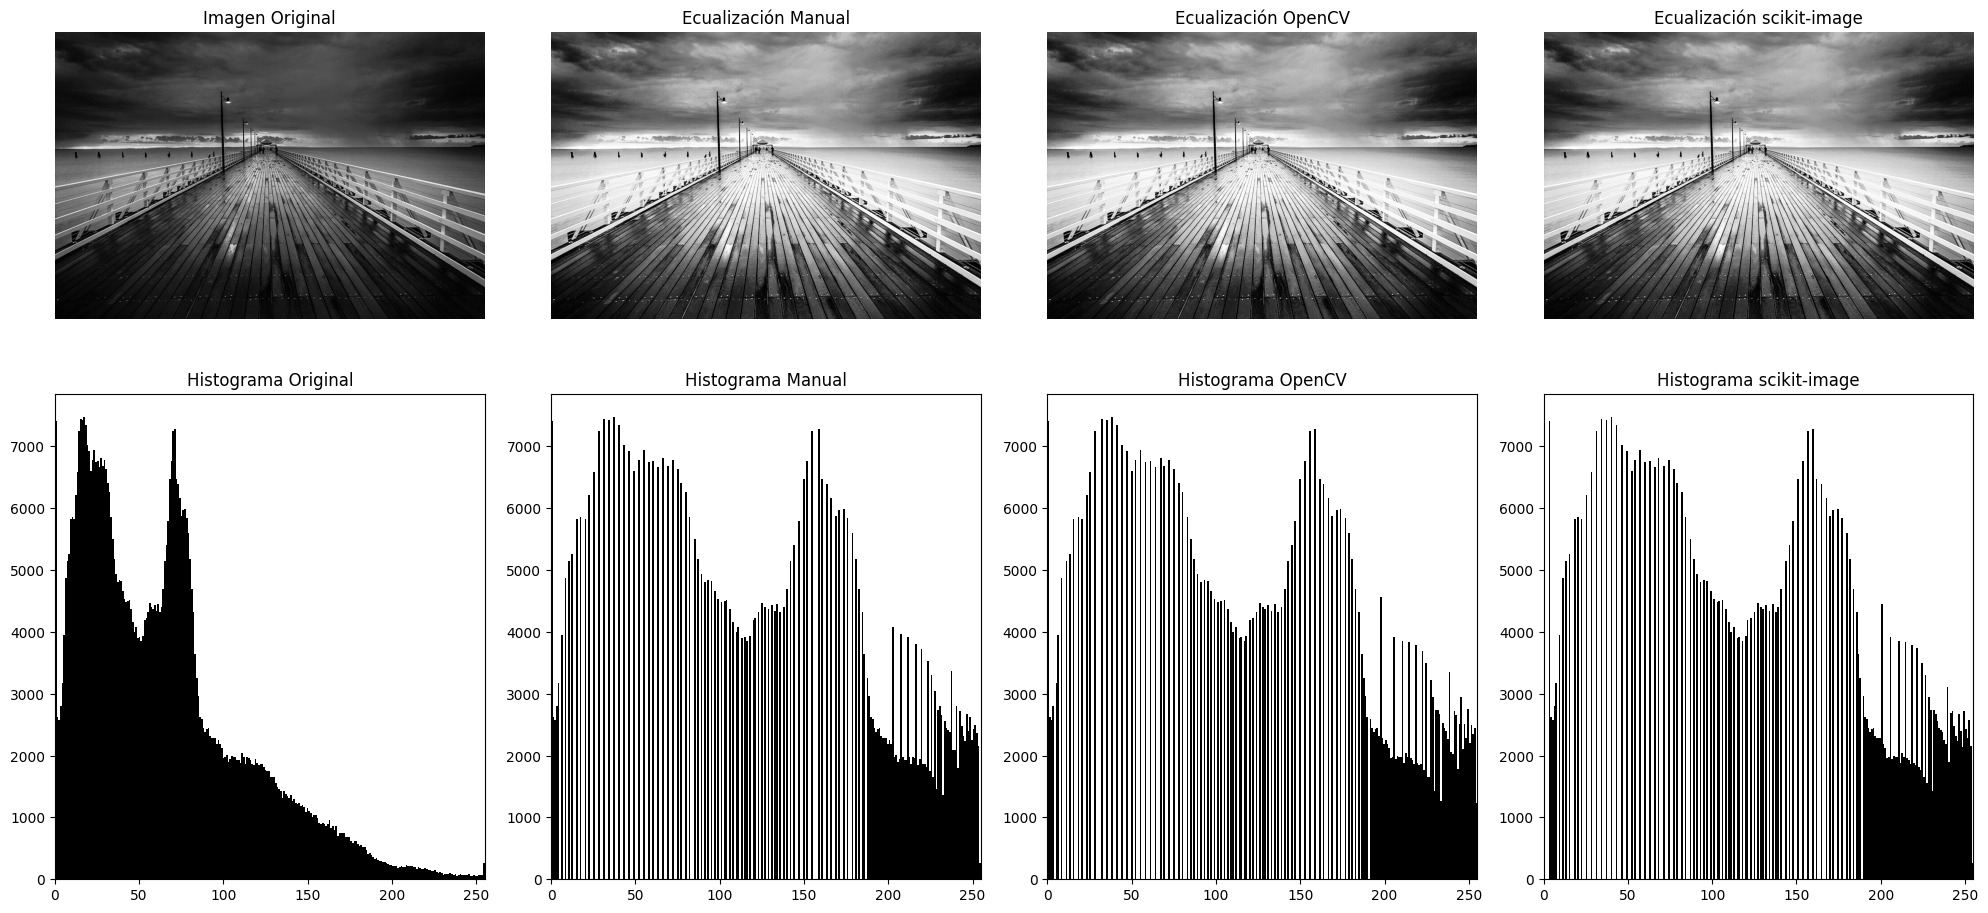

In [33]:

# Creamos una figura con 2 filas y 4 columnas para mostrar:
# - Fila 1: Imágenes (original, manual, OpenCV y scikit-image)
# - Fila 2: Histogramas correspondientes
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Fila 1: Mostrar imágenes
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title("Imagen Original")
axs[0, 0].axis('off')

axs[0, 1].imshow(img_eq_manual, cmap='gray')
axs[0, 1].set_title("Ecualización Manual")
axs[0, 1].axis('off')

axs[0, 2].imshow(img_eq_cv, cmap='gray')
axs[0, 2].set_title("Ecualización OpenCV")
axs[0, 2].axis('off')

axs[0, 3].imshow(img_eq_sk_uint8, cmap='gray')
axs[0, 3].set_title("Ecualización scikit-image")
axs[0, 3].axis('off')

# Fila 2: Mostrar histogramas
axs[1, 0].hist(img.flatten(), bins=256, range=(0, 255), color='black')
axs[1, 0].set_title("Histograma Original")
axs[1, 0].set_xlim([0, 255])

axs[1, 1].hist(img_eq_manual.flatten(), bins=256, range=(0, 255), color='black')
axs[1, 1].set_title("Histograma Manual")
axs[1, 1].set_xlim([0, 255])

axs[1, 2].hist(img_eq_cv.flatten(), bins=256, range=(0, 255), color='black')
axs[1, 2].set_title("Histograma OpenCV")
axs[1, 2].set_xlim([0, 255])

axs[1, 3].hist(img_eq_sk_uint8.flatten(), bins=256, range=(0, 255), color='black')
axs[1, 3].set_title("Histograma scikit-image")
axs[1, 3].set_xlim([0, 255])

plt.tight_layout()
plt.show()

# Observación:
## La ecualización manual y la función cv2.equalizeHist muestran resultados muy similares, ya que utilizan el mismo principio basado en la CDF
## La función skimage.exposure.equalize_hist puede presentar ligeras diferencias debido a que trabaja con imágenes en formato float y una normalización distinta
